## 연속시간 푸리에 급수

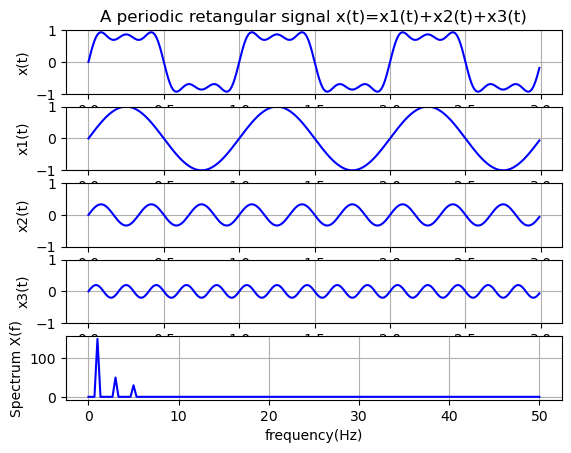

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fs = 100; dt=1/fs; N=300; #샘플링 주파수=100Hz, 0.01초 간격으로 300개 샘플링
pi2 = np.pi * 2
t = np.arange(0,N) * dt

x1t = 1.0 * np.sin(pi2 * 1 * t)
x2t = 1/3 * np.sin(pi2 * 3 * t)
x3t = 1/5 * np.sin(pi2 * 5 * t)
xt = x1t + x2t + x3t # 세 신호의 합성

df = fs / N #주파수 간격
f = np.arange(0,N) * df #주파수축 0 ~ 50Hz(0~fs/2)
xf=np.fft.fft(xt) # 주파수별 크기 계산(FFT)

plt.subplot(5,1,1); plt.plot(t,xt,"b"); plt.ylim(-1,1);plt.grid()
plt.ylabel("x(t)")
plt.title("A periodic retangular signal x(t)=x1(t)+x2(t)+x3(t)")
plt.subplot(5,1,2);plt.plot(t,x1t,"b");plt.ylim(-1,1);plt.grid()
plt.ylabel("x1(t)")
plt.subplot(5,1,3);plt.plot(t,x2t,"b"); plt.ylim(-1,1); plt.grid()
plt.ylabel("x2(t)")
plt.subplot(5,1,4);plt.plot(t,x3t,"b");plt.ylim(-1,1);plt.grid()
plt.ylabel("x3(t)")
plt.subplot(5,1,5);plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]),"b");
plt.xlabel("frequency(Hz)");plt.ylabel("Spectrum X(f)");plt.grid()

## 순수한 Signal Magnitude 시각화

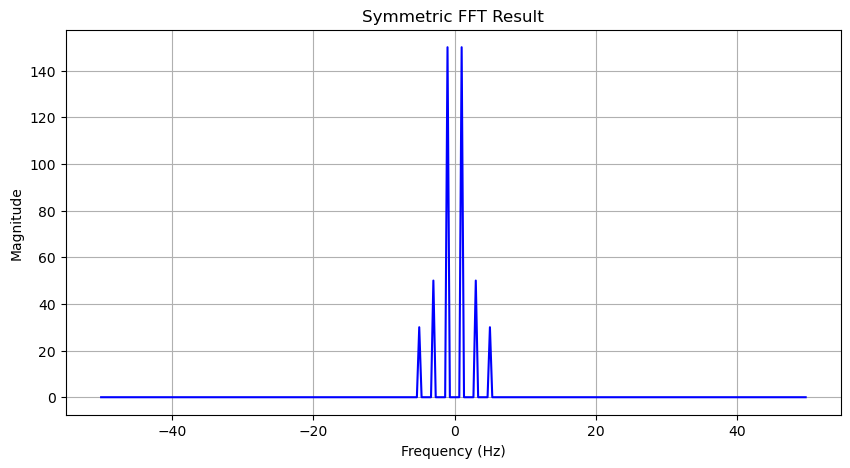

In [2]:
def complex_magnitude(z):
    real_part = np.real(z) # 실수부
    imag_part = np.imag(z) # 허수부
    magnitude = np.sqrt(real_part ** 2 + imag_part ** 2)
    return magnitude

test = complex_magnitude(xf)

# 음의 주파수까지 포함한 주파수 축 생성
f_shifted = np.fft.fftshift(np.fft.fftfreq(N, d=dt))  # 전체 주파수 축 (-fs/2 ~ fs/2)
xf_shifted = np.fft.fftshift(test)  # FFT 결과를 중심(-fs/2)으로 이동

plt.figure(figsize=(10, 5))
plt.plot(f_shifted, np.abs(xf_shifted), "b")
plt.title("Symmetric FFT Result")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

## 삼각함수에 의한 연속시간 푸리에급수
연속시간 주기신호의 CTFS 를 삼각함수식으로 일반화하면 다음과 같이 나타낼수 있다.
$$ \tilde{x}(t) = a_0 + \sum\limits_{k = 1}^\infty a_k cos(kw_0t) + \sum\limits_{k=1}^\infty b_k sin(kw_0t)$$
여기서 각 항의 계수는 다음과 같으며, CTFS 계수라고 부른다.
$$ a_0 = \frac{2}{T} \int_T v \tilde{x}(t)dt$$
$$ a_k = \frac{2}{T} \int_T \tilde{x}(t)cos(kw_0t)dt $$
$$ b_k = \frac{2}{T} \int_T \tilde{x}(t)sin(kw_0t)dt $$

k=0: a_k=6.0000, b_k=0.0000
k=1: a_k=2.0000, b_k=0.0000
k=2: a_k=-0.0000, b_k=1.5000
k=3: a_k=-0.0000, b_k=0.0000


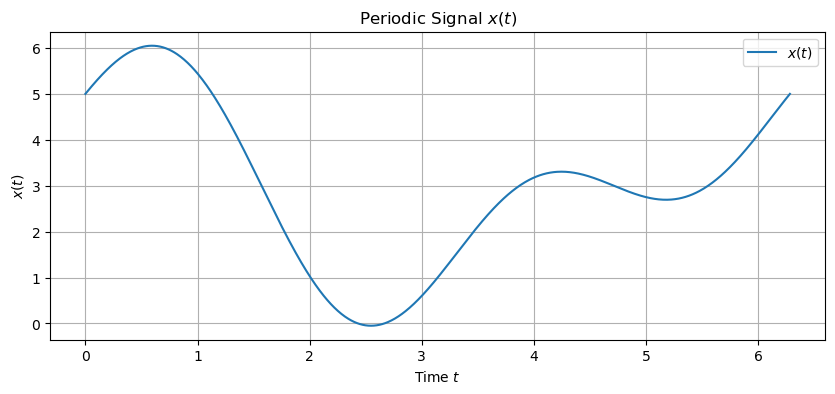

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 2 * np.pi  # Period
omega_0 = 2 * np.pi / T  # Fundamental angular frequency

# Define a periodic signal x(t)
def x(t):
    return 3 + 2 * np.cos(omega_0 * t) + 1.5 * np.sin(2 * omega_0 * t)

# Compute Fourier coefficients
def compute_coefficients(x, T, omega_0, k):
    t = np.linspace(0, T, 1000)
    x_t = x(t)

    # Compute a_k and b_k
    a_k = (2 / T) * np.trapezoid(x_t * np.cos(k * omega_0 * t), t)
    b_k = (2 / T) * np.trapezoid(x_t * np.sin(k * omega_0 * t), t)

    return a_k, b_k

# Test for specific k values
k_values = [0, 1, 2, 3]
coefficients = []

for k in k_values:
    a_k, b_k = compute_coefficients(x, T, omega_0, k)
    coefficients.append((a_k, b_k))
    print(f"k={k}: a_k={a_k:.4f}, b_k={b_k:.4f}")

# Visualize x(t)
t = np.linspace(0, T, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x(t), label="$x(t)$")
plt.title("Periodic Signal $x(t)$")
plt.xlabel("Time $t$")
plt.ylabel("$x(t)$")
plt.grid()
plt.legend()
plt.show()
